In [1]:
from matplotlib import pyplot as plt
import numpy as np
from PIL import Image
from skimage import exposure
import random
import sys

In [2]:
im1 = np.array(Image.open('band1.gif', 'r'))
im2 = np.array(Image.open('band2.gif', 'r'))
im3 = np.array(Image.open('band3.gif', 'r'))
im4 = np.array(Image.open('band4.gif', 'r'))

In [3]:
def euclidean_dist(x1,x2):
    dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5
    return dist


def clustering(k,imageinput,centroids):
    min_dist = sys.maxsize

    classData = np.zeros((512,512))

    for i in range(512):
        for j in range(512):
            for x in range(k):
                distance = euclidean_dist(imageinput[:,i,j],centroids[x])


                if(min_dist > distance):
                    min_dist = distance
                    label = x


            classData[i][j] = label
            min_dist = sys.maxsize
    
    return classData

def updateCentroids(imageinput,centroids,classData):
    sums =[0,0,0,0]
    total = 0
    updatedCentroids = np.zeros((k,4))

    for x in range (k):
        for i in range(512):
            for j in range(512):
                if classData[i][j] == x:
                    sums = np.array(sums) + imageinput[:,i,j]
                    total+=1
        sums = sums/total
        updatedCentroids[x] = sums
        sums = [0,0,0,0]
        total = 0
    return updatedCentroids

In [4]:
 color = [[255,0,0],[0,0,255]] 

In [5]:
k=2

In [6]:
# 2. Input satellite images, imageInput (512, 512,4)

imageinput=np.array([im1,im2,im3,im4])
print(imageinput.reshape(512,512,4).shape)
print(imageinput[0][0].shape)


(512, 512, 4)
(512,)


In [7]:
# 3. Initialize clusteredImage as the output image
clusteredImage = np.zeros((512,512,3))

In [8]:
# 4. Select k random x,y co-ordinates and extract pixel values from imageInput 

coord = np.array(([300,100],[200,300],[200,400]))

c1=[]
c2=[]
c3=[]
c4=[]
for i in range(k):
    c1.append(im1[coord[i][0],coord[i][1]])
    c2.append(im2[coord[i][0],coord[i][1]])
    c3.append(im3[coord[i][0],coord[i][1]])
    c4.append(im4[coord[i][0],coord[i][1]])

    
initCentroids=np.array([c1,c2,c3,c4]).T
print(initCentroids.shape)

# we will be updating centroids later
centroids = initCentroids


(2, 4)


In [9]:
print(centroids)

[[ 4  4  6 12]
 [11 13 16 19]]


### Step 5

In [10]:
### loop until stopping criteria is met

count = 0
while(count < 10):
    classData = clustering(k,imageinput,centroids)
    updatedCentroids = np.round(updateCentroids(imageinput,centroids,classData))
    if (centroids==updatedCentroids).all():
        print("matched")
        break
    else:
        centroids = updatedCentroids
    count+=1
    

<ipython-input-3-da625201b4e3>:2: RuntimeWarning: overflow encountered in ubyte_scalars
  dist = sum([(a - b) ** 2 for a, b in zip(x1, x2)])**0.5


In [11]:
# np.set_printoptions(threshold=sys.maxsize)
# print(classData)

In [12]:
print(updatedCentroids)

[[ 8.  9. 11. 16.]
 [10. 11. 14. 26.]]


### step 6

In [13]:
for i in range(512):
    for j in range(512):
        clusteredImage[i,j,:] = color[int(classData[i,j])]


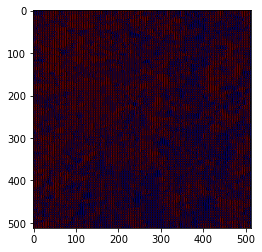

In [14]:
img = Image.fromarray(clusteredImage.astype(int), 'RGB')
imgplot = plt.imshow(img)
plt.show()